In [183]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [184]:
df = pd.read_csv("./kpi.csv", header=0, na_values='.');
df.head()

,ticker,year,period,reportEndDate,sectorId,marketId,branchId,bruttomarginal,operativtkassaflodesmarginal,vinsttillvaxt,...,fcf/proc,price,price3,price6,price12,price-3,price-6,price-12,stockChange,stockChangePct
0,247,2019,4,Fri Jan 31 2020 00:00:00 GMT+0100 (GMT+01:00),6,5,90,54.595001,19.497999,NaN,...,10.493000,22.20,20.50,NaN,NaN,16.65,17.10,7.86,-1.70,-0.076577
1,247,2019,3,Wed Oct 30 2019 00:00:00 GMT+0100 (GMT+01:00),6,5,90,52.354000,8.031000,NaN,...,7.412000,16.30,22.20,21.8,NaN,16.90,14.05,8.50,5.90,0.361963
2,247,2019,2,Tue Jul 30 2019 00:00:00 GMT+0200 (GMT+02:00),6,5,90,50.417000,-3.922000,NaN,...,-13.989000,16.90,16.30,22.2,NaN,14.05,7.94,6.44,-0.60,-0.035503
3,247,2019,1,Wed May 01 2019 00:00:00 GMT+0200 (GMT+02:00),6,5,90,59.682999,-36.041000,NaN,...,-103.260002,14.00,17.25,17.0,20.5,7.90,7.90,6.12,2.90,0.207143
4,247,2018,4,Thu Jan 31 2019 00:00:00 GMT+0100 (GMT+01:00),6,5,90,50.270000,-13.115000,NaN,...,24.594999,7.86,14.00,17.1,22.2,8.22,6.54,6.86,6.14,0.781170


In [185]:
df.columns

Index(['ticker', 'year', 'period', 'reportEndDate', 'sectorId', 'marketId',
       'branchId', 'bruttomarginal', 'operativtkassaflodesmarginal',
       'vinsttillvaxt', 'ebittillvaxt', 'omsattningstillvaxt', 'vinst/aktie',
       'egetkapital/aktie', 'fcf/aktie', 'rorelsemarginal', 'ebita/aktie',
       'ebit/aktie', 'operativkassaflode/aktie', 'aretskassaflode/aktie',
       'vinstmarginal', 'ebitda/marginal', 'fcf/Marginal', 'capex/proc',
       'vinst/fcf', 'omsattning/aktie', 'fcf/proc', 'price', 'price3',
       'price6', 'price12', 'price-3', 'price-6', 'price-12', 'stockChange',
       'stockChangePct'],
      dtype='object')

In [186]:
df = df[['ticker','sectorId', 'marketId', 'branchId', 'bruttomarginal', 'operativtkassaflodesmarginal','rorelsemarginal','vinstmarginal', 'ebitda/marginal', 'price', 'price3','price6', 'price12', 'price-3','price-6', 'price-12']]

In [187]:

df["price3"] = (df["price3"]-df["price"]) / df["price"]
df["price6"] = (df["price6"]-df["price"]) / df["price"]
df["price12"] = (df["price12"]-df["price"]) / df["price"]
df["price-3"] = (df["price-3"]-df["price"]) / df["price"]
df["price-6"] = (df["price-6"]-df["price"]) / df["price"]
df["price-12"] = (df["price-12"]-df["price"]) / df["price"]
df = df[df["bruttomarginal"] > -200000]
df = df[df["vinstmarginal"] > -200000]

Text(0.5, 1.0, 'Large cap')

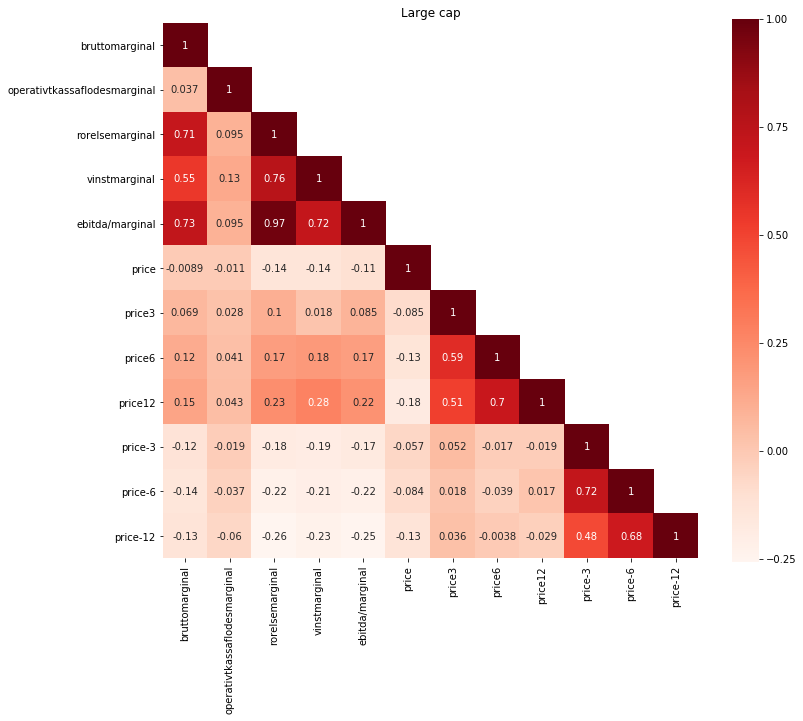

In [188]:
# Correlation matrix for largecap

corr= df[df.marketId==1].drop(columns=["marketId", "branchId", "sectorId"]).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)
plt.title('Large cap')

Text(0.5, 1.0, 'Mid cap')

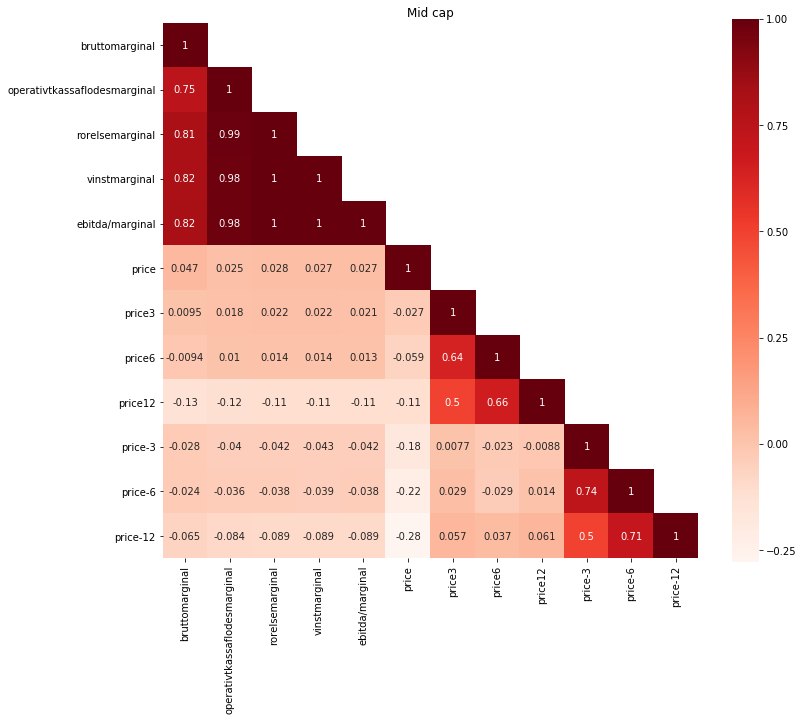

In [189]:
# Correlation matrix for midcap

corr= df[df.marketId==2].drop(columns=["marketId", "branchId", "sectorId"]).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)
plt.title('Mid cap')

Text(0.5, 1.0, 'Rest c(r)ap')

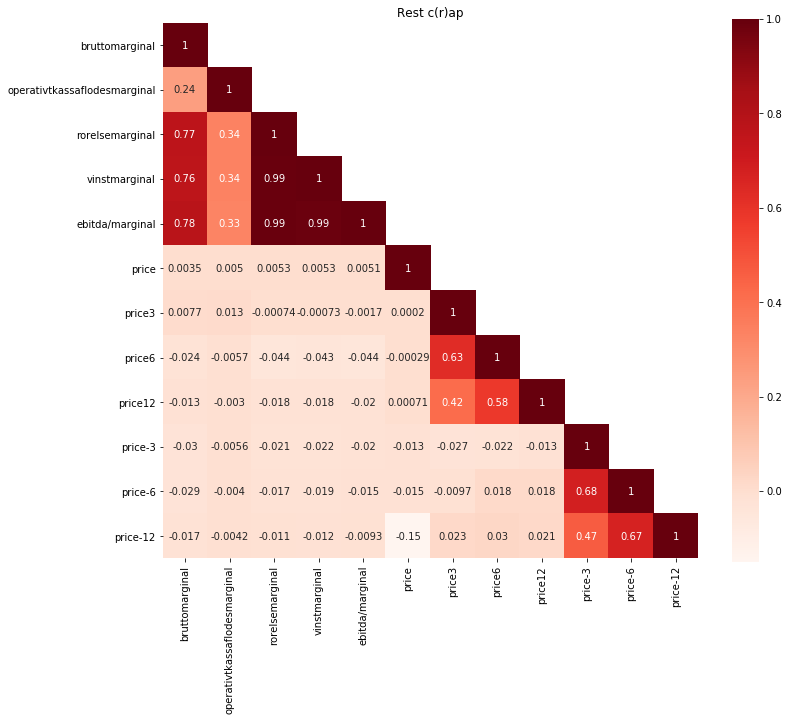

In [190]:
# Correlation matrix for rest

corr= df[(df.marketId!=1) & (df.marketId!=2)].drop(columns=["marketId", "branchId", "sectorId"]).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)
plt.title('Rest c(r)ap')

Text(0.5, 1.0, 'Large cap')

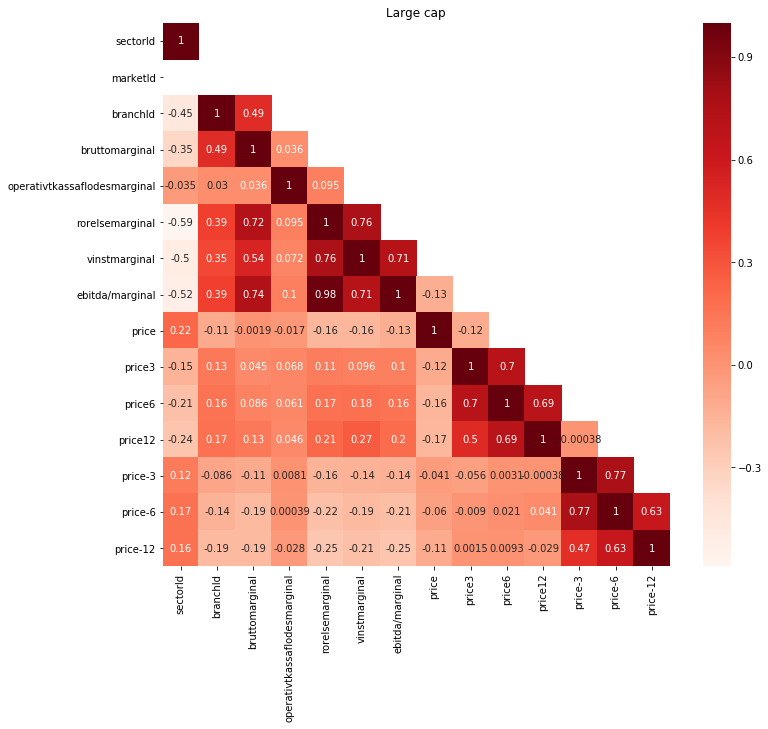

In [231]:
# LARGE CAP

lc = df[df.marketId == 1]
lc=lc.dropna()
# print(lc.head())
# df.head(int(len(df)*(n/100)))
# best = best.sort_values(by=['price6'])
mask = np.array(lc.corr().drop(columns=["marketId"]))
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=lc.corr().drop(columns=["marketId"]),mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)
plt.title('Large cap')

(513, 16)
(51, 16)
      ticker  sectorId  marketId  branchId  bruttomarginal  \
2420     EVO         8         1        54       61.604000   
2419     EVO         8         1        54       63.383999   
3809  KLOV B         1         1        75       61.430000   
5859   SBB B         1         1        75       60.368000   
6594  SWEC B         5         1        34       18.948000   

      operativtkassaflodesmarginal  rorelsemarginal  vinstmarginal  \
2420                     38.229000        38.069000      36.361000   
2419                     55.479000        38.070999      36.036999   
3809                    124.852997        56.389000     183.587006   
5859                    -13.012000        52.714001     152.477997   
6594                     21.197001         9.288000       8.956000   

      ebitda/marginal   price    price3    price6   price12   price-3  \
2420        44.952000  108.40  0.735424  0.946494  1.749077  0.270295   
2419        45.296001  188.12  0.116309  

Text(0.5, 1.0, 'Large cap')

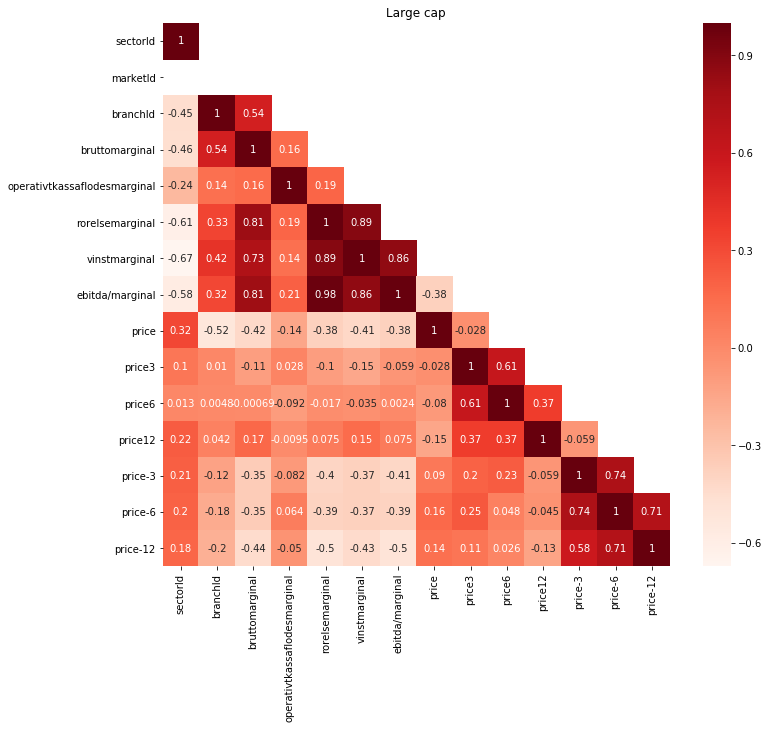

In [232]:
# LARGE CAP

print(lc.shape)
lc =lc.sort_values('price12',ascending=False).head(round(0.1*len(lc)))
print(lc.shape)

print(lc.head())
# df.head(int(len(df)*(n/100)))
# best = best.sort_values(by=['price6'])
mask = np.array(lc.corr().drop(columns=["marketId"]))
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=lc.corr().drop(columns=["marketId"]),mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)
plt.title('Large cap')

In [233]:
lc = df[df.marketId == 1]
topp10 = lc.sort_values('price12',ascending=False).head(round(0.1*len(lc)))
bot10 = lc.sort_values('price12',ascending=True).head(round(0.1*len(lc)))

In [234]:
topp10.describe()

,sectorId,marketId,branchId,bruttomarginal,operativtkassaflodesmarginal,rorelsemarginal,vinstmarginal,ebitda/marginal,price,price3,price6,price12,price-3,price-6,price-12
count,84.000000,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000,82.000000,82.000000
mean,3.488095,1.0,59.416667,50.182215,30.080893,31.229869,48.221667,34.754631,134.182381,0.116927,0.268176,0.578285,0.005153,0.005931,-0.023249
std,2.299785,0.0,22.888524,20.165897,65.755403,28.675248,63.437312,27.013530,116.748879,0.133785,0.190777,0.227800,0.133404,0.190295,0.275699
min,1.000000,1.0,2.000000,7.093000,-88.431000,-34.539001,-32.950001,-21.132999,6.570000,-0.176644,-0.213277,0.381219,-0.422709,-0.325888,-0.439292
25%,1.000000,1.0,33.000000,34.167751,6.675500,10.287250,7.803500,13.019500,66.152500,0.036485,0.157633,0.420361,-0.083125,-0.111011,-0.186493
50%,4.000000,1.0,75.000000,49.196499,16.606000,19.822001,16.291000,25.745500,105.120000,0.110716,0.260490,0.537506,0.003312,-0.011230,-0.094724
75%,5.000000,1.0,75.000000,68.027000,43.638250,57.097000,82.311750,59.690750,180.475000,0.192436,0.369118,0.632239,0.084749,0.079986,0.071428
max,8.000000,1.0,86.000000,83.860001,565.671997,128.209000,251.843994,128.378006,719.900000,0.735424,0.946494,1.749077,0.342812,0.931382,1.076536


In [235]:
bot10.describe()

,sectorId,marketId,branchId,bruttomarginal,operativtkassaflodesmarginal,rorelsemarginal,vinstmarginal,ebitda/marginal,price,price3,price6,price12,price-3,price-6,price-12
count,84.000000,84.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000,82.000000,79.000000
mean,5.654762,1.0,48.071429,40.387464,5.439190,16.663357,12.605119,21.298119,232.237857,-0.084572,-0.146351,-0.344262,0.004503,-0.019772,-0.035786
std,2.735285,0.0,23.126048,21.389540,118.136880,17.687759,17.314821,18.137784,236.481304,0.127882,0.172318,0.130851,0.141298,0.204331,0.247497
min,1.000000,1.0,15.000000,9.279000,-672.544006,-25.910999,-27.733000,-25.000000,5.830000,-0.600624,-0.705515,-0.748580,-0.266883,-0.433045,-0.574018
25%,4.000000,1.0,23.000000,21.443500,1.176500,7.200500,3.974750,10.752500,83.282500,-0.143755,-0.240831,-0.400589,-0.094040,-0.154014,-0.174482
50%,7.000000,1.0,48.000000,35.232000,11.452000,13.005000,8.778500,17.744500,160.850000,-0.069759,-0.128821,-0.302031,-0.003076,-0.052630,-0.054734
75%,8.000000,1.0,68.000000,61.076501,20.230999,20.729000,16.687750,28.784250,280.100000,0.001645,-0.041218,-0.240703,0.088680,0.059919,0.095351
max,9.000000,1.0,93.000000,78.014999,473.255005,68.994003,101.360001,71.570999,1235.500000,0.249057,0.486792,-0.195406,0.382736,0.678996,0.746811


In [ ]:
# df = df.drop(columns=["price", "price12"])

In [192]:
# df.shape

In [193]:
# df.isnull().sum().sort_values(ascending = False)

In [194]:
# df = df.dropna()

In [195]:
# df.shape

In [196]:
# print(df.dtypes)
# df.sectorId = df.sectorId.astype('float64')   
# df.marketId = df.marketId.astype('float64')                          
# df.branchId = df.branchId.astype('float64')
# print(df.dtypes)

In [197]:
# inertia = []
# # dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]

# clmns = df.columns
# X = stats.zscore(df[clmns].drop(columns="ticker"))

# for k in range(1, 20):
#     kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
#     inertia.append(np.sqrt(kmeans.inertia_))
    
# plt.plot(range(1, 20), inertia, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

In [198]:
# clmns = df.columns
# df_tr_std = stats.zscore(df[clmns].drop(columns="ticker"))


# #Cluster the data
# kmeans = KMeans(n_clusters=5, random_state=0).fit(df_tr_std)
# labels = kmeans.labels_

# #Glue back to originaal data
# df['vclusters'] = labels


# #Lets analyze the clusters
# print(df[clmns].groupby(['vclusters']).mean())

# #Scatter plot of Wattage and Duration
# plt.figure(figsize=(15,8))

# # bruttomarginal                  float64
# # operativtkassaflodesmarginal    float64
# # rorelsemarginal                 float64
# # vinstmarginal                   float64
# # ebitda/marginal                 float64
# sns.lmplot('bruttomarginal', 'vinstmarginal', 
#            data=df, 
#            fit_reg=False, 
#            hue="vclusters",
#            height=10)
# plt.title('bruttomarginal vs vinstmarginal')
# plt.xlabel('bruttomarginal')
# plt.ylabel('vinstmarginal')

In [199]:
# best = df[df["vclusters"]==0]
# best.sort_values(by=['price6'])

# # best.price6.sort_values(ascending = False)
# # ax = sns.scatterplot(x="bruttomarginal", y="vinstmarginal", hue="price6", data=best)
# # plt.title('bruttomarginal vs vinstmarginal')
# # plt.xlabel('bruttomarginal')
# # plt.ylabel('vinstmarginal')

In [200]:
# print(best.ticker.unique())